## Recommendation System Project

### Electoronics - Smartphone domain

In [1]:
#Importing packages
import pandas as pd
import numpy as np
import seaborn as sns
from surprise import Dataset,Reader
from surprise.model_selection import cross_validate
from surprise import NormalPredictor
from surprise.model_selection import train_test_split
from surprise import SVD, accuracy
from surprise import KNNWithMeans
from surprise import Prediction

##### Importing all Datasets

In [2]:
dfFile1 = pd.read_csv('phone_user_review_file_1.csv', engine='python')
dfFile2 = pd.read_csv('phone_user_review_file_2.csv', engine='python')
dfFile3 = pd.read_csv('phone_user_review_file_3.csv', engine='python')
dfFile4 = pd.read_csv('phone_user_review_file_4.csv', engine='python')
dfFile5 = pd.read_csv('phone_user_review_file_5.csv', engine='python')
dfFile6 = pd.read_csv('phone_user_review_file_6.csv', engine='python')

In [3]:
print('Shape of file 1 : ',dfFile1.shape);
print('Shape of file 2 : ',dfFile2.shape);
print('Shape of file 3 : ',dfFile3.shape);
print('Shape of file 4 : ',dfFile4.shape);
print('Shape of file 5 : ',dfFile5.shape);
print('Shape of file 6 : ',dfFile6.shape);

Shape of file 1 :  (374910, 11)
Shape of file 2 :  (114925, 11)
Shape of file 3 :  (312961, 11)
Shape of file 4 :  (98284, 11)
Shape of file 5 :  (350216, 11)
Shape of file 6 :  (163837, 11)


#### Merging all datasets and printing its shape

In [4]:
mergedDF = pd.concat([dfFile1, dfFile2, dfFile3, dfFile4, dfFile5, dfFile6])
mergedDF.shape

(1415133, 11)

In [5]:
# Info about dataset 
mergedDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1415133 entries, 0 to 163836
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   phone_url  1415133 non-null  object 
 1   date       1415133 non-null  object 
 2   lang       1415133 non-null  object 
 3   country    1415133 non-null  object 
 4   source     1415133 non-null  object 
 5   domain     1415133 non-null  object 
 6   score      1351644 non-null  float64
 7   score_max  1351644 non-null  float64
 8   extract    1395772 non-null  object 
 9   author     1351931 non-null  object 
 10  product    1415132 non-null  object 
dtypes: float64(2), object(9)
memory usage: 129.6+ MB


In [6]:
mergedDF.describe().T

,count,mean,std,min,25%,50%,75%,max
score,1351644.0,8.00706,2.616121,0.2,7.2,9.2,10.0,10.0
score_max,1351644.0,10.00000,0.000000,10.0,10.0,10.0,10.0,10.0


#### Rounding off to near integer

In [7]:
mergedDF = mergedDF.copy()
mergedDF.shape

(1415133, 11)

In [8]:
mergedDF['score'] = round(mergedDF['score'])

In [9]:
mergedDF.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.0,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [10]:
#null check
mergedDF.isnull().any()

phone_url    False
date         False
lang         False
country      False
source       False
domain       False
score         True
score_max     True
extract       True
author        True
product       True
dtype: bool

In [11]:
mergedDF.isna().sum()

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score        63489
score_max    63489
extract      19361
author       63202
product          1
dtype: int64

In [12]:
mergedDF['score_max'].value_counts()

10.0    1351644
Name: score_max, dtype: int64

In [13]:
mergedDF['score_max'] = mergedDF['score_max'].fillna(mergedDF['score_max'].mean())

In [14]:
mergedDF['score_max'].value_counts()

10.0    1415133
Name: score_max, dtype: int64

In [15]:
mergedDF['score'] = mergedDF['score'].fillna(mergedDF['score'].median())

In [16]:
mergedDF.dropna(subset=['product'],inplace=True)

In [17]:
mergedDF.isna().sum()

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score            0
score_max        0
extract      19361
author       63201
product          0
dtype: int64

#### Removing Duplicates

In [18]:
duplicatedData = mergedDF[mergedDF.duplicated(subset=['phone_url','date','lang','country','extract','author','product'])]
duplicatedData

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
342,/cellphones/samsung-galaxy-s8/,4/26/2017,nl,nl,Coolblue,coolblue.nl,10.0,10.0,Ik vind het tot nu toe een heel erg aangenaam ...,Stefanie Hinneman,Samsung Galaxy S8 Zwart
343,/cellphones/samsung-galaxy-s8/,4/26/2017,nl,nl,Coolblue,coolblue.nl,10.0,10.0,Ik vind het tot nu toe een heel erg aangenaam ...,Stefanie Hinneman,Samsung Galaxy S8 Zwart
371,/cellphones/samsung-galaxy-s8/,4/25/2017,nl,nl,Coolblue,coolblue.nl,10.0,10.0,Tot nu toe in de eerste dagen weinig tot geen ...,Robin Winckens,Samsung Galaxy S8 Zwart
452,/cellphones/samsung-galaxy-s8/,4/25/2017,nl,nl,Coolblue,coolblue.nl,10.0,10.0,Wat een huge scherm!,B Yapar,Samsung Galaxy S8 Zwart
3718,/cellphones/samsung-galaxy-s6-edgeplus/,10/4/2015,en,us,Amazon,amazon.com,10.0,10.0,"For readers, my opinions on this device (ATT 3...",FrozenCloud,"Samsung Galaxy S6 Edge+, Black 64GB (Verizon W..."
...,...,...,...,...,...,...,...,...,...,...,...
158568,/cellphones/samsung-sgh-2400/,7/21/2000,en,gb,Ciao,ciao.co.uk,6.0,10.0,The more expensive of the Samsung series but l...,cellnetsms,Samsung SGH 2400
158911,/cellphones/samsung-sgh-600/,4/30/2015,tr,tr,Cepworld,cepworld.com,9.0,10.0,varsa satan 05312614607,muhsin,Samsung (936) SGH-600
159375,/cellphones/alcatel-ot-easy/,11/13/2009,es,es,Dooyoo,dooyoo.es,6.0,10.0,en la opi,NaN,Alcatel One Touch Easy
160164,/cellphones/philips-genie-2000/,8/20/2000,it,it,Ciao,ciao.it,8.0,10.0,"Il Genie e' un buon telefono, scorrimente del ...",tonyblack,Philips Genie 2000


In [19]:
duplicatedData.score_max.sum()

86780.0

In [20]:
mergedDF.duplicated(subset=['phone_url','date','lang','country','extract','author','product']).sum()

8678

In [21]:
mergedDF.drop_duplicates(subset=['phone_url','date','lang','country','extract','author','product'],keep='first',inplace=True)
mergedDF.duplicated(subset=['phone_url','date','lang','country','extract','author','product']).sum()

0

#### Keeping 1000000 as data sample with random state = 612

In [22]:
mergedDF = mergedDF.sample(n=1000000, random_state=612)

#### Dropping irrelevant features

In [23]:
processedDF = mergedDF[['author', 'product', 'score']]
processedDF.shape

(1000000, 3)

#### Identify the most rated features.

In [24]:
processedDF.groupby('product')['score'].count().sort_values(ascending=False)

product
Lenovo Vibe K4 Note (White,16GB)                                                                                       3681
Lenovo Vibe K4 Note (Black, 16GB)                                                                                      3106
OnePlus 3 (Graphite, 64 GB)                                                                                            2896
OnePlus 3 (Soft Gold, 64 GB)                                                                                           2523
Samsung Galaxy Express I8730                                                                                           1875
                                                                                                                       ... 
NOKIA Lumia 820 - noir                                                                                                    1
NOKIA Lumia 920 - svart                                                                                                   1


#### Identify the users with most number of reviews.

In [25]:
processedDF.groupby('author')['score'].count().sort_values(ascending=False)

author
Amazon Customer                 54621
Cliente Amazon                  13670
e-bit                            6025
Client d'Amazon                  5461
Amazon Kunde                     3387
                                ...  
achuck49                            1
achultze49                          1
achunn82                            1
achurch09                           1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!        1
Name: score, Length: 597157, dtype: int64

#### Select the data with products having more than 50 ratings and users who have given more than 50 ratings.
#### Report the shape of the final dataset.

In [26]:
groupedDF = pd.DataFrame(processedDF.groupby('product').count())
author50DF = groupedDF['author'] > 50
score50DF = groupedDF['score'] > 50
groupedDF.where(author50DF & score50DF,inplace=False).dropna().shape

(4096, 2)

In [27]:
groupedDF.where(author50DF & score50DF,inplace=False).dropna().head()

,author,score
product,,
3100 / 3120,55.0,55.0
5.5-Inch Unlocked Lenovo A850 3G Smartphone-(960x540) Quad Core 4GB MT6582m 1331MHz Android 4.2 Dual Camera +Dual SIM -Black (Rooted + Google Play),78.0,78.0
6126 / 6131 / 6133,88.0,88.0
6682 / 6681,63.0,65.0
"AICEK Coque ASUS ZenFone 3 Max ZC520TL, AICEK Etui Silicone Gel ASUS ZenFone 3 Max Housse Antichoc ZenFone 3 Max Transparente Souple Coque de Protection pour ASUS ZenFone 3 Max(5.2 Pouces)",58.0,58.0


#### Build a popularity based model and recommend top 5 mobile phones.

In [28]:
ratingsCount = pd.DataFrame(processedDF.groupby('product')['score'].mean())
ratingsCount['ratingsCount'] = pd.DataFrame(processedDF.groupby('product')['score'].count())
ratingsCount.head()

,score,ratingsCount
product,,
"'Smartphone Meizu Pro 5, 5,7 pouces avec Exynos 7420 Octa 8 Core Processeur. mÃ©moire RAM 4 Go et 64 Go mÃ©moire...",8.0,1
"'Sony Xperia X (F5122) â€“ White â€“ Dual Sim (Google Android 6.0.1, 5 Display, 2 x CORTEX A72 1.8 GHz + 4 x cortex-a53...",10.0,1
"'Sony Xperia X (F5122) â€“ rosa â€“ Dual Sim (Google Android 6.0.1, 5 Display, 2 x CORTEX A72 1.8 GHz + 4 x cortex-a53...",10.0,1
"(7.62 cm (3 )Afficheur/Ã©cran, 2 MPixCamÃ©ra;blanc)-Smartphone",6.0,1
"(CUBOT) GT88 5.5"" qHD 1.3GHz MTK6572 2-Core Android 4.2.2 3G Phone 8MP CAM 512MB RAM 4GB ROM",8.0,1


In [29]:
#Top 5 smartphones
ratingsCount['top'] = ratingsCount['ratingsCount'] * ratingsCount['score']
ratingsCount.sort_values(by='top', ascending=False).head(5)

,score,ratingsCount,top
product,,,
"Lenovo Vibe K4 Note (White,16GB)",7.186634,3681,26454.0
"OnePlus 3 (Graphite, 64 GB)",8.698895,2896,25192.0
"Lenovo Vibe K4 Note (Black, 16GB)",7.227946,3106,22450.0
"OnePlus 3 (Soft Gold, 64 GB)",8.514467,2523,21482.0
Samsung Galaxy Express I8730,9.008000,1875,16890.0


#### Build a collaborative filtering model using SVD. You can use SVD from surprise or build it from scratch
#### (Note: Incase you’re building it from scratch you can limit your data points to 5000 samples if you face memory issues). 
#### Build a collaborative filtering model using kNNWithMeans from surprise. 
#### You can try both user-based and item-based model

In [30]:
reader = Reader(rating_scale=(1, 10))

sampleDF = processedDF.sample(n=5000, random_state=30)

sampleDF.shape


(5000, 3)

In [31]:
userProductData = Dataset.load_from_df(sampleDF[['author','product','score']], reader = reader)
userProductData.df

,author,product,score
172701,Alberto,Huawei Ascend Mate 7 Premium - Smartphone libr...,8.0
91792,nicname,Apple iPhone 4 32Gb,10.0
202413,Burkhard NiewÃ¶hner,"Samsung DuoS B7722i Smartphone (8,1 cm (3,2 Zo...",10.0
273896,J. Grimm,"Microsoft Lumia 950 Dual-SIM Smartphone (5,2 Z...",6.0
329712,RIKOPATO2005,Nokia N97,10.0
...,...,...,...
299926,Anonymous,Nokia N85 Copper Unlocked GSM Slider phones wi...,10.0
74770,L,"Samsung N9005 Galaxy Note 3 Smartphone, 32 GB,...",10.0
72771,Amazon Customer,Samsung Galaxy Reverb (Virgin Mobile),2.0
86745,CG,"Microsoft Lumia 650 Smartphone da 16GB, Bianco...",10.0


In [32]:
# Applying SVD

svd_model = SVD ()

X, y = train_test_split(userProductData,test_size=0.30,random_state=30)

svd_model.fit(X)

In [33]:
y_pred = svd_model.test(y)
accuracy.rmse(y_pred)

RMSE: 2.5816


2.581600140885078

In [34]:
print('Y PRED : ', y_pred)

Y PRED :  [Prediction(uid='Tameka Stanley', iid='BLU Dash 5.5 - Unlocked Cell Phones - Retail Packaging - White', r_ui=10.0, est=8.040285714285714, details={'was_impossible': False}), Prediction(uid='Lechi', iid='Lenovo Motorola Defy mini Smartphone (8,1 cm (3,2 Zoll) HVGA-Touchscreen, 3 Megapixel Kamera, Android 2.3) schwarz', r_ui=10.0, est=8.040285714285714, details={'was_impossible': False}), Prediction(uid='funkydancer', iid='Samsung SGH J600', r_ui=8.0, est=8.040285714285714, details={'was_impossible': False}), Prediction(uid='Htou', iid='Samsung Galaxy S7 goud, roze / 32 GB', r_ui=9.0, est=8.040285714285714, details={'was_impossible': False}), Prediction(uid='Brumburum', iid='Sony Ericsson Xperia Pro (Red)', r_ui=10.0, est=8.040285714285714, details={'was_impossible': False}), Prediction(uid='Sergio', iid='Apple - Smartphone libre iphone 7 128gb negro brillante', r_ui=10.0, est=8.040285714285714, details={'was_impossible': False}), Prediction(uid='Pa0lito89', iid='Samsung ATIV S

In [35]:
predDFTest = pd.DataFrame([[x.uid,x.iid,x.est] for x in y_pred])
predDFTest.head()

,0,1,2
0,Tameka Stanley,BLU Dash 5.5 - Unlocked Cell Phones - Retail P...,8.040286
1,Lechi,"Lenovo Motorola Defy mini Smartphone (8,1 cm (...",8.040286
2,funkydancer,Samsung SGH J600,8.040286
3,Htou,"Samsung Galaxy S7 goud, roze / 32 GB",8.040286
4,Brumburum,Sony Ericsson Xperia Pro (Red),8.040286


#### Build a collaborative filtering model using kNNWithMeans from surprise. Ycan try both user-based and item-based model

In [36]:
# User-Based Model
knn_model_user = KNNWithMeans(k=50, sim_options={'name': 'cosine', 'user_based': True})
knn_model_user.fit(X)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [37]:
# Item-Based Model
knn_model_item = KNNWithMeans(k=50, sim_options={'name': 'cosine', 'user_based': False})
knn_model_item.fit(X)

Computing the cosine similarity matrix...
Done computing similarity matrix.


#### Evaluate the collaborative model. Print RMSE value

In [38]:
y_pred_user = knn_model_user.test(y)
y_pred_item = knn_model_item.test(y)

print("User-based Model RMSE")
accuracy.rmse(y_pred_user)
# User based model test prediction
test_pred_user_df = pd.DataFrame([[x.uid,x.iid,x.est] for x in y_pred_user])
test_pred_user_df.head(5)

User-based Model RMSE
RMSE: 2.5849


,0,1,2
0,Tameka Stanley,BLU Dash 5.5 - Unlocked Cell Phones - Retail P...,8.040286
1,Lechi,"Lenovo Motorola Defy mini Smartphone (8,1 cm (...",8.040286
2,funkydancer,Samsung SGH J600,8.040286
3,Htou,"Samsung Galaxy S7 goud, roze / 32 GB",8.040286
4,Brumburum,Sony Ericsson Xperia Pro (Red),8.040286


In [39]:
print("Item-based Model RMSE")
accuracy.rmse(y_pred_item)
# Item based model test prediction
test_pred_item_df = pd.DataFrame([[x.uid,x.iid,x.est] for x in y_pred_item])
test_pred_item_df.head(5)

Item-based Model RMSE
RMSE: 2.6137


,0,1,2
0,Tameka Stanley,BLU Dash 5.5 - Unlocked Cell Phones - Retail P...,8.040286
1,Lechi,"Lenovo Motorola Defy mini Smartphone (8,1 cm (...",8.040286
2,funkydancer,Samsung SGH J600,8.040286
3,Htou,"Samsung Galaxy S7 goud, roze / 32 GB",8.040286
4,Brumburum,Sony Ericsson Xperia Pro (Red),8.040286


#### Predict score (average rating) for test users.

In [40]:
#Test User 1

knn_model_user.predict(uid="funkydancer",iid="Samsung SGH J600")

Prediction(uid='funkydancer', iid='Samsung SGH J600', r_ui=None, est=8.040285714285714, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

In [41]:
# Test User 2

knn_model_user.predict(uid="Brumburum",iid="Sony Ericsson Xperia Pro (Red)")

Prediction(uid='Brumburum', iid='Sony Ericsson Xperia Pro (Red)', r_ui=None, est=8.040285714285714, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

#### Report your findings and inferences.

<AxesSubplot:xlabel='score', ylabel='count'>

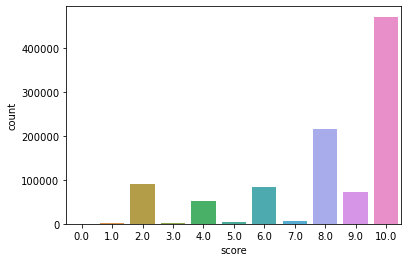

In [42]:
sns.countplot(x= processedDF['score'])

#### Report

1. Most of the users are satisified and has provided 10 on 10 for most of the products
2. Seconded by 8 rating
3. Above pattern also shows the series of unhappy users on different numbers

#### Try and recommend top 5 products for test users.

In [43]:
df_pred = pd.DataFrame(y_pred_user)

In [44]:
def recommendations(user, n):
    recommended_products = df_pred [df_pred['uid'] == user][['uid','iid','est']].sort_values('est', ascending=False).head(n)
    return recommended_products

#### Top 5 recommendation for uid= Amazon Customer

In [45]:
recommendations('Amazon Customer',5)

,uid,iid,est
1326,Amazon Customer,"OnePlus 3 (Soft Gold, 64 GB)",8.734446
1094,Amazon Customer,"OnePlus 3 (Soft Gold, 64 GB)",8.734446
1111,Amazon Customer,"Lenovo Vibe K5 (Grey, VoLTE update)",8.343340
954,Amazon Customer,"Lenovo Vibe K5 (Grey, VoLTE update)",8.343340
1155,Amazon Customer,"Lenovo Vibe K5 (Grey, VoLTE update)",8.343340


#### Try cross validation techniques to get better results.

In [46]:
cross_validate(svd_model, userProductData, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    2.5860  2.6008  2.4674  2.4999  2.5402  2.5389  0.0504  
MAE (testset)     1.9689  1.9808  1.8913  1.9292  1.9752  1.9491  0.0341  
Fit time          0.28    0.26    0.25    0.22    0.27    0.26    0.02    
Test time         0.00    0.00    0.00    0.02    0.00    0.00    0.01    


{'test_rmse': array([2.58595397, 2.60083707, 2.46739247, 2.49993725, 2.54022309]),
 'test_mae': array([1.96885569, 1.98082546, 1.89134484, 1.92918072, 1.97520635]),
 'fit_time': (0.2815690040588379,
  0.26403117179870605,
  0.2542545795440674,
  0.21999597549438477,
  0.27053332328796387),
 'test_time': (0.0, 0.0010457038879394531, 0.0, 0.016148805618286133, 0.0)}

### In what business scenario you should use popularity based Recommendation Systems?

1) OTT platform - Recommending the trending movies/web series to user.

2) Food delivery - Top selling food in poarticular location or frequently ordered food.

3) Shopping site/ecommerce - To recommend top selling product to customers.

### In what business scenario you should use CF based Recommendation Systems?

In the same OTT and shopping platforms if the recommendation involves the paterren of user vs item and the likeness and choice the CF based recommendation with be the best fit.

### What other possible methods can you think of which can further improve the recommendation for different users ?

1) Other than collaborative filtering content based will be a good option where in similar products and recommended combos can added.

2) Vidoe ranking in case of OTT or any vidoe platforms

3) Knowledge-based Recommender systems